In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.pyplot import MultipleLocator
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter, filtfilt, savgol_filter
from scipy.signal import find_peaks

#Python之pandas读取Excel表格空值为nan的处理 https://blog.csdn.net/wl_Honest/article/details/99082977
#第一步選定需要比較的檔案
def coma(df):
    
    listRX1=[]
    listRX2=[]

    listRY1=[]
    listRY2=[]

    listRZ1=[]
    listRZ2=[]

    listLX1=[]
    listLX2=[]

    listLY1=[]
    listLY2=[]

    listLZ1=[]
    listLZ2=[]

    #反向用於抓點用
    oppo_listGRZ=[]
    oppo_listGLZ=[]
    listGRZ=[]
    listGLZ=[]

    #反向用於抓點用
    oppo_listMRZ=[]
    oppo_listMLZ=[]
    listMRZ=[]
    listMLZ=[]

    listflag_Record=[]
    listflag_one=[]
    listflag_two=[]
    listflag_three=[]

    listRtoe=[]
    listLtoe=[]

    listRX1=df.RightFootAcc_X.tolist() 
    listRY1=df.RightFootAcc_Y.tolist() 
    listRZ1=df.RightFootAcc_Z.tolist() 

    listLX1=df.LeftFootAcc_X.tolist() 
    listLY1=df.LeftFootAcc_Y.tolist() 
    listLZ1=df.LeftFootAcc_Z.tolist() 

    listGRZ=df.RightFootGyro_Z
    listGLZ=df.LeftFootGyro_Z

    listMRZ=df.RightFootMag_Z
    listMLZ=df.LeftFootMag_Z



    listflag_Record=df.Record.tolist()
    listflag_one=df.Record.tolist()
    listflag_two=df.Record.tolist()
    listflag_three=df.Record.tolist()


    #去除空白
    listRX1 = [i for i in listRX1 if i != '']
    listRX2 = [i for i in listRX2 if i != '']

    listRY1 = [i for i in listRY1 if i != '']
    listRY2 = [i for i in listRY2 if i != '']

    listRZ1 = [i for i in listRZ1 if i != '']
    listRZ2 = [i for i in listRZ2 if i != '']

    listLX1 = [i for i in listLX1 if i != '']
    listLX2 = [i for i in listLX2 if i != '']

    listLY1 = [i for i in listLY1 if i != '']
    listLY2 = [i for i in listLY2 if i != '']

    listLZ1 = [i for i in listLZ1 if i != '']
    listLZ2 = [i for i in listLZ2 if i != '']

    listGRZ = [i for i in listGRZ if i != '']
    listGLZ = [i for i in listGLZ if i != '']

    listGRZ = [i for i in listGRZ if i != '']
    listGLZ = [i for i in listGLZ if i != '']

    listMRZ = [i for i in listMRZ if i != '']
    listMLZ = [i for i in listMLZ if i != '']




   
    #抓出雙腳最大承認步數
    gaitmin=0
    if(len(listRX1)<len(listLX1)):
        gaitmin=len(listRX1)
    else:
        gaitmin=len(listLX1)
    print(gaitmin)
         


    #抓轉彎
    for f in range(len(listflag_Record)):
         if (f >= gaitmin):
            listflag_Record[f]=''
        
         elif(listflag_Record[f]=='轉彎'):
            listflag_Record[f]=f
        
         else:
            listflag_Record[f]=''

    listflag_Record = [i for i in listflag_Record if i != '']

    #抓一級疼痛
    for f in range(len(listflag_one)):
        
        if (f >= gaitmin):
            listflag_one[f]=''
        
        elif(listflag_one[f]=='1級疼痛'):
            listflag_one[f]=f
        
        else:
            listflag_one[f]=''

    listflag_one = [i for i in listflag_one if i != '']
    


    #抓二級疼痛
    for f in range(len(listflag_two)):
        if (f >= gaitmin):
            listflag_two[f]=''
        
        elif(listflag_two[f]=='2級疼痛'):
            listflag_two[f]=f
        
        else:
            listflag_two[f]=''
    listflag_two = [i for i in listflag_two if i != '']


    #抓三級疼痛
    for f in range(len(listflag_three)):
        if (f >= gaitmin):
            listflag_three[f]=''
        
        elif(listflag_three[f]=='3級疼痛'):
            listflag_three[f]=f
        
        else:
            listflag_three[f]=''
    listflag_three = [i for i in listflag_three if i != '']




#=========================================
    #抓點用
    for i in range(len(listGRZ)):
        oppo_listGRZ.append(listGRZ[i])
    
    for i in range(len(listMRZ)):
        oppo_listMRZ.append(listMRZ[i])

    l=len(listGLZ)
    #左腳陀螺儀Z軸要乘-1
    for i in range(l):
        oppo_listGLZ.append(listGLZ[i]*(-1))

    l=len(listMLZ)
    #左腳歐拉角Z軸要乘-1
    for i in range(l):
        oppo_listMLZ.append(listMLZ[i]*(-1))
#=========================================



    l=len(listRX1)
    #右腳加速度X要乘-1
    for i in range(l):
        listRX1[i]= listRX1[i]*(-1)
   

    l=len(listGRZ)
    #右腳陀螺儀Z軸要乘-1
    for i in range(l):
        listGRZ[i]= listGRZ[i]*(-1)


    l=len(listMRZ)
    #右腳陀螺儀Z軸要乘-1
    for i in range(l):
        listMRZ[i]= listMRZ[i]*(-1)


 


    #濾波
    #https://blog.csdn.net/sinat_21258931/article/details/79298478
    #sg濾波器，滑动窗口为11，多项式阶数为3
    
    
    #右腳initial_contact、左腳oppo heelrise
    listGRZ= savgol_filter(listGRZ,10,3)

    #右腳feet_adjacent
    oppo_listGRZ= savgol_filter(oppo_listGRZ,40,3)

    #左腳initial_contact、右腳oppo heelrise
    listGLZ= savgol_filter(listGLZ,10,3)

    #左腳feet_adjacent
    oppo_listGLZ= savgol_filter(oppo_listGLZ,47,3)

    #左腳toe_off、#右腳foot_flat
    listMRZ= savgol_filter(listMRZ,60,8)

    #右腳tibia_vertical
    oppo_listMRZ= savgol_filter(oppo_listMRZ,30,4)

    #60/5
    #右腳toe_off、#左腳foot_flat
    listMLZ= savgol_filter(listMLZ,60,4)

    #左腳tibia_vertical
    oppo_listMLZ= savgol_filter(oppo_listMLZ,30,4)
    
    

    return listRX1,listRY1,listRZ1,listLX1,listLY1,listLZ1,listflag_Record,listflag_one,listflag_two,listflag_three,listGRZ,oppo_listGRZ,listGLZ,oppo_listGLZ,listMRZ,oppo_listMRZ,listMLZ,oppo_listMLZ


#讀新檔
def new(df):

    listRX2=df.RightFoot_X.tolist()
    listRY2=df.RightFoot_Y.tolist()
    listRZ2=df.RightFoot_Z.tolist()

    listLX2=df.LeftFoot_X.tolist()
    listLY2=df.LeftFoot_Y.tolist()
    listLZ2=df.LeftFoot_Z.tolist()

    listRX2 = [i for i in listRX2 if i != '']
    listRY2 = [i for i in listRY2 if i != '']
    listRZ2 = [i for i in listRZ2 if i != '']

    listLX2 = [i for i in listLX2 if i != '']
    listLY2 = [i for i in listLY2 if i != '']
    listLZ2 = [i for i in listLZ2 if i != '']
    return listRX2,listRY2,listRZ2,listLX2,listLY2,listLZ2

#自動化抓步數
def find(df,listRX1,listLX1):
    
   
    listRX2=df.Raw_RightFoot_X.tolist()
    listLX2=df.Raw_LeftFoot_X.tolist()
    
    listLtoe=df.Left_frature_toe_off_peaks.tolist()
    listRtoe=df.Right_frature_toe_off_peaks.tolist()
    

    listRX2 = [i for i in listRX2 if i != '']
    listLX2 = [i for i in listLX2 if i != '']

    listLtoe = [i for i in listLtoe if i != '']
    listRtoe = [i for i in listRtoe if i != '']
   
    findRX=[]
    findLX=[]

    comRX=[]
    comLX=[]
    #先讀到右腳toe的第一個位置
    a=listRtoe[0]
    #print(a)

    #用往後10步準確定位位置
    for i in range(10):
        findRX.append(listRX2[a+i])      
        #print(findRX)

    #先讀到右腳toe的第一個位置
    b=listLtoe[0]

    #用往後10步準確定位位置
    for i in range(10):
        findLX.append(listLX2[b+i])
    
    #用分割特徵toe 定義為開頭
    for i in range(len(listRX1)-10):
        comRX=[]
        for j in range(10):
            comRX.append(listRX1[i+j])
        # if (i==0):
            
        #     print("=findRX=")
        #     print(findRX)
        #     print("==comRX====")
        #     print(comRX)
        #     print("=============")
        if(comRX==findRX):
            # print("X")
            # print(i)
            a=i

    for i in range(len(listLX1)-10):
        comLX=[]
        for j in range(10):
            comLX.append(listLX1[i+j])
        # if (i==0):
            
        #     print("=findY=")
        #     print(findLX)
        #     print("==comRL====")
        #     print(comLX)
        #     print("=============")
        if(comLX==findLX):
            # print("Y")
            # print(i)
            b=i

    #讓位置有個基準點，將第一點歸0，其餘同減listRtoe[0]
    x=listRtoe[0]
    for i in range(len(listRtoe)):
        
        listRtoe[i]=listRtoe[i]-x

    #讓位置有個基準點，將第一點歸0，其餘同減listLtoe[0]
    x=listLtoe[0]
    for i in range(len(listLtoe)):
        
        listLtoe[i]=listLtoe[i]-x
    
    return a,b,listRtoe, listLtoe





#第一步選定需要比較的檔案
df = pd.read_excel("李燈貴2.xlsx",keep_default_na=False)
listRX1,listRY1,listRZ1,listLX1,listLY1,listLZ1,listflag_Record,listflag_one,listflag_two,listflag_three,listGRZ,oppo_listGRZ,listGLZ,oppo_listGLZ,listMRZ,oppo_listMRZ,listMLZ,oppo_listMLZ=coma(df)




18499


In [17]:
# #https://blog.csdn.net/sinat_21258931/article/details/79298478
# #sg濾波器，滑动窗口为11，多项式阶数为3

# print(listMLZ[:5])
# plt.plot(listMLZ[:1000])
# plt.show()
# leftAngle = savgol_filter(listMLZ,30, 4)
# plt.plot(leftAngle[:1000])
# plt.show()



# plt.plot(listGRZ[:1000])
# plt.show()
# leftGyroX = savgol_filter(listGRZ,10,3)
# plt.plot(leftGyroX[:1000])
# plt.plot(np.zeros_like(10), "--", color="gray")
# plt.show()




每個步態波型都要確認過

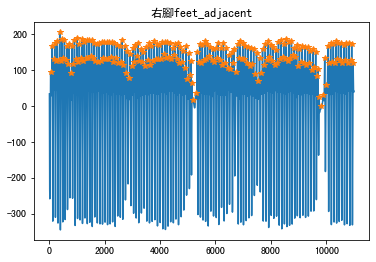

[   43    96   149   191   243   283   334   371   421   458   508   542
   592   628   678   714   768   811   864   904   954   991  1043  1080
  1132  1169  1221  1259  1309  1343  1395  1434  1485  1522  1574  1613
  1665  1705  1757  1801  1853  1893  1943  1983  2035  2075  2126  2166
  2218  2257  2309  2350  2401  2441  2494  2536  2587  2625  2677  2721
  2774  2816  2867  2917  2971  3016  3068  3108  3160  3201  3254  3296
  3349  3393  3446  3493  3545  3589  3642  3686  3738  3784  3835  3878
  3931  3976  4027  4071  4124  4166  4218  4260  4313  4355  4408  4452
  4504  4546  4597  4639  4691  4735  4787  4830  4883  4930  4982  5032
  5085  5114  5154  5190  5292  5342  5391  5431  5482  5525  5576  5617
  5670  5712  5765  5807  5860  5903  5957  6003  6054  6095  6148  6194
  6245  6287  6340  6386  6439  6481  6535  6587  6639  6671  6750  6800
  6848  6890  6943  6985  7038  7083  7136  7184  7236  7282  7333  7379
  7433  7485  7536  7592  7646  7701  7753  7802  7

In [25]:
total_min=1000
listR_toe=[]
listR_feet=[]
listR_tibia=[]
listR_initial=[]
listR_foot=[]
listR_heel=[]
listR__oppo_heel=[]
listtest=[]
listL_toe=[]
listL_feet=[]
listL_tibia=[]
listL_initial=[]
listL_foot=[]
listL_heel=[]
listL__oppo_heel=[]
toe_y=[]
from scipy.signal import find_peaks
#===================================================================
#先抓右腳toe_off
Rtoe=np.array(listMLZ[:11000])
Rtoe_peaks, turn_y= find_peaks(Rtoe,distance=60)
# plt.title("右腳toe_off")
# plt.plot(Rtoe)
# plt.plot(Rtoe_peaks, Rtoe[Rtoe_peaks],"*")
# plt.show()

# #print(np.array(Rtoe[Rtoe_peaks]).astype(int))
# listtest=np.ndarray.tolist(Rtoe[Rtoe_peaks].astype(int))
# print(listtest)

# avarage=np.average(listtest)
# print(avarage)

# Rtoe=np.array(listMLZ)
# Rtoe_peaks, turn_y= find_peaks(Rtoe,height=avarage,distance=100)
# plt.title("右腳toe_off")
# plt.plot(Rtoe)
# plt.plot(Rtoe_peaks, Rtoe[Rtoe_peaks],"*")
# plt.show()


for i in range(len(Rtoe_peaks)):
    #if(i!=0 ):
            if (Rtoe_peaks[i]!= 5278):
                listR_toe.append(Rtoe_peaks[i])

# for i in range(len(turn_y['peak_heights'])):
#      toe_y.append(int(turn_y['peak_heights'][i]))
# print(toe_y)
print("=========================")
#print(listR_toe)
if(total_min>len(listR_toe)):
     total_min=len(listR_toe)
#===================================================================
#左腳toe_off
Ltoe=np.array(listMRZ[:11000])
Ltoe_peaks, _= find_peaks(Ltoe,distance=60)
# plt.title("左腳toe_off")
# plt.plot(Ltoe)
# plt.plot(Ltoe_peaks, Ltoe[Ltoe_peaks],"*")
# plt.show()
# flag_insert=0
#print(Ltoe_peaks)
for i in range(len(Ltoe_peaks)):
    #if(i!=0):
            listL_toe.append(Ltoe_peaks[i])

# for i in range(len(Ltoe_peaks)):
#     #if(i!=0):
#     if (listL_toe[i]<12356 and listL_toe[i+1]>12356):
#             flag_insert=i         
# print(flag_insert)
if(total_min>len(listL_toe)):
     total_min=len(listL_toe)



#===================================================================
#右腳feet_adjacent
#Rfeet=np.array(oppo_listGRZ[5050:6000])
Rfeet=np.array(oppo_listGRZ[:11000])
Rfeet_peaks, _= find_peaks(Rfeet,height=0,distance=28)
plt.title("右腳feet_adjacent")
plt.plot(Rfeet)
plt.plot(Rfeet_peaks, Rfeet[Rfeet_peaks],"*")
plt.show()

# plt.title("listGRZ")
# plt.plot(listGRZ[5000:5600])
# plt.show()


if(total_min>len(listR_feet)):
     total_min=len(listR_feet)
print(Rfeet_peaks)
#===================================================================
#左腳feet_adjacent
Lfeet=np.array(oppo_listGLZ[:5000])
#判斷用Lfeet=np.array(oppo_listGLZ[3000:4000])
Lfeet_peaks, _= find_peaks(Lfeet,height=40,distance=20)
#Lfeet_peaks, _= find_peaks(Lfeet,height=40,distance=20)
# plt.title("左腳feet_adjacent")
# plt.plot(Lfeet)
# plt.plot(Lfeet_peaks, Lfeet[Lfeet_peaks],"*")
# plt.show()
for i in range(len(Lfeet_peaks)):
    #if(i!=0 and i%2==0):
    if( i%2==0):
        listL_feet.append(Lfeet_peaks[i])
# print("前600=====================")
# print(listL_feet)
# print("=====================")

Lfeet=np.array(oppo_listGLZ[5000:5400])
#判斷用Lfeet=np.array(oppo_listGLZ[3000:4000])
Lfeet_peaks, _= find_peaks(Lfeet,height=0,distance=20)
# plt.title("左腳feet_adjacent")
# plt.plot(Lfeet)
# plt.plot(Lfeet_peaks, Lfeet[Lfeet_peaks],"*")
# plt.show()

# print(Lfeet_peaks)


for i in range(len(Lfeet_peaks)):
    #if(i!=0 and i%2==0):
    if( i%2==1):
        listL_feet.append(Lfeet_peaks[i]+5000)


Lfeet=np.array(oppo_listGLZ[5400:9600])
#Lfeet=np.array(oppo_listGLZ[6000:7000])
#判斷用Lfeet=np.array(oppo_listGLZ[3000:4000])
Lfeet_peaks, _= find_peaks(Lfeet,height=50,distance=20)
# plt.title("左腳feet_adjacent")
# plt.plot(Lfeet)
# plt.plot(Lfeet_peaks, Lfeet[Lfeet_peaks],"*")
# plt.show()
# plt.plot(listGLZ[6000:7000])
# plt.show()
# print(Lfeet_peaks)


for i in range(len(Lfeet_peaks)):
    #if(i!=0 and i%2==0):
    if( i%2==1):
        listL_feet.append(Lfeet_peaks[i]+5400)


# print(listL_feet)
# # print(Lfeet_peaks[0:10])


# Lfeet=np.array(oppo_listGLZ[9500:10000])
# #Lfeet=np.array(oppo_listGLZ[6000:7000])
# #判斷用Lfeet=np.array(oppo_listGLZ[3000:4000])
# Lfeet_peaks, _= find_peaks(Lfeet,distance=20)
# plt.title("左腳feet_adjacent")
# plt.plot(Lfeet)
# plt.plot(Lfeet_peaks, Lfeet[Lfeet_peaks],"*")
# plt.show()
# plt.plot(listGLZ[9500:10000])
# plt.show()
# print(Lfeet_peaks)



if(total_min>len(listL_feet)):
     total_min=len(listL_feet)

# print("後400=====================")
# print(listL_feet)
# print("=====================")

# Lfeet=np.array(oppo_listGLZ[:1000])
# #判斷用Lfeet=np.array(oppo_listGLZ[3000:4000])
# Lfeet_peaks, _= find_peaks(Lfeet,height=80,distance=20)
# plt.title("左腳feet_adjacent")
# plt.plot(Lfeet)
# plt.plot(Lfeet_peaks, Lfeet[Lfeet_peaks],"*")
# plt.show()
#print(listL_feet)

# plt.plot(listGLZ[:1000])
# plt.show()





In [27]:

#===================================================================
#右腳tibia_vertical
Rtibia=np.array(oppo_listMRZ[:11000])
Rtibia_peaks, _= find_peaks(Rtibia,distance=80)
# plt.title("右腳tibia_vertical")
# plt.plot(Rtibia)
# plt.plot(Rtibia_peaks, Rtibia[Rtibia_peaks],"*")
# plt.show()
#反向對照圖確認用
# plt.plot(listMRZ[:1000])
# plt.show()

for i in range(len(Rtibia_peaks)):
    if i!=0:
        listR_tibia.append(Rtibia_peaks[i])

if(total_min>len(listR_tibia)):
     total_min=len(listR_tibia)
#print(listR_tibia)
#===================================================================
#左腳tibia_vertical
Ltibia=np.array(oppo_listMLZ[:11000])
Ltibia_peaks, _= find_peaks(Ltibia,distance=80)
#plt.title("左腳tibia_vertical")
# plt.plot(Ltibia)
# plt.plot(Ltibia_peaks, Ltibia[Ltibia_peaks],"*")
# plt.show()
#反向對照圖確認用
# plt.plot(listMLZ[:1000])
# plt.show()
# print(Ltibia_peaks[:10])
for i in range(len(Ltibia_peaks)):
    #if(i!=0):
        listL_tibia.append(Ltibia_peaks[i])

# for i in range(len(Ltibia_peaks)):
#     if(i):
#         listL_tibia.append(Ltibia_peaks[i])
if(total_min>len(listL_tibia)):
     total_min=len(listL_tibia)


#===================================================================
#右腳initial_contact
Rinitial=np.array(listGRZ[:11000])
Rinitial_peaks, _= find_peaks(Rinitial,distance=70)
# plt.title("右腳initial_contact")
# plt.plot(Rinitial)
# plt.plot(Rinitial_peaks, Rinitial[Rinitial_peaks],"*")
# plt.show()
# print(Rinitial_peaks)
for i in range(len(Rinitial_peaks)):
    if(i!=0):
        listR_initial.append(Rinitial_peaks[i])
listL__oppo_heel=listR_initial
if(total_min>len(listR_initial)):
     total_min=len(listR_initial)



#===================================================================
#左腳initial_contact
Linitial=np.array(listGLZ[:11000])
Linitial_peaks, _= find_peaks(Linitial,distance=80)
#plt.title("左腳initial_contact")
# plt.plot(Linitial)
# plt.plot(Linitial_peaks, Linitial[Linitial_peaks],"*")
# plt.show()
#print(Linitial_peaks)
for i in range(len(Linitial_peaks)):
    #if(i!=0):
        listL_initial.append(Linitial_peaks[i])

if(total_min>len(Linitial_peaks)):
     total_min=len(Linitial_peaks)

#===================================================================
#右腳foot_flat
Rfoot=np.array(listMRZ[:11000])
Rfoot_peaks, _= find_peaks(Rfoot,distance=60)
#plt.title("右腳foot_flat")
# plt.plot(Rfoot)
# plt.plot(Rfoot_peaks, Rfoot[Rfoot_peaks],"*")
# plt.show()
# print(Rfoot_peaks)
for i in range(len(Rfoot_peaks)):
    if(i!=0):
        listR_foot.append(Rfoot_peaks[i])

if(total_min>len(listR_foot)):
     total_min=len(listR_foot)

#===================================================================
#左腳foot_flat
Lfoot=np.array(listMLZ[:11000])
Lfoot_peaks, _= find_peaks(Lfoot,distance=80)
#plt.title("左腳foot_flat")
# plt.plot(Lfoot)
# plt.plot(Lfoot_peaks, Lfoot[Lfoot_peaks],"*")
# plt.show()
#print(Lfoot_peaks)
for i in range(len(Lfoot_peaks)):
   #if(i!=0):
        listL_foot.append(Lfoot_peaks[i])
if(total_min>len(listL_foot)):
     total_min=len(listL_foot)

#===================================================================
#右腳heel_rise
if (len(listR_toe)>len(listL_toe)):
    heel_rise_len=len(listL_toe)
else:
    heel_rise_len=len(listR_toe) 

for i in range(total_min):
    if(i!=0):
        heel_rise_buff=0
        if(listL_foot[i]-listL_tibia[i]%2!=0):
            heel_rise_buff=(listL_foot[i]-listL_tibia[i])/2+1
            listR_heel.append((heel_rise_buff+listL_tibia[i]).astype(int) )
        
        else:
            heel_rise_buff=(listL_foot[i]-listL_tibia[i])/2
            listR_heel.append((heel_rise_buff+listL_tibia[i]).astype(int) )
#listR_heel=np.array(listR_heel)     
#print(listR_heel)
if(total_min>len(listR_heel)):
     total_min=len(listR_heel)
print(listR_heel)
#===================================================================
#左腳heel_rise
if (len(listR_toe)>len(listL_toe)):
    heel_rise_len=len(listL_toe)
else:
    heel_rise_len=len(listR_toe) 

for i in range(total_min):
    heel_rise_buff=0
    if(listR_foot[i]-listR_tibia[i]%2!=0):
        heel_rise_buff=(listR_foot[i]-listR_tibia[i])/2+1
        listL_heel.append((heel_rise_buff+listR_tibia[i]).astype(int))

    else:
        heel_rise_buff=(listR_foot[i]-listR_tibia[i])/2
        listL_heel.append((heel_rise_buff+listR_tibia[i]).astype(int))
#listL_heel=np.array(listL_heel)    
#print(listL_heel)
if(total_min>len(listL_heel)):
     total_min=len(listL_heel)



#===================================================================
#右腳oppo heelrise要用左腳的陀螺儀
Linitial=np.array(listGLZ[:11000])
Linitial_peaks, _= find_peaks(Linitial,distance=80)
# plt.plot(Linitial)
# plt.plot(Linitial_peaks, Linitial[Linitial_peaks],"*")
# plt.show()
# print(Linitial_peaks)
for i in range(len(Linitial_peaks)):
    if(i!=0):
        listR__oppo_heel.append(Linitial_peaks[i])
#print(listR__oppo_heel)
if(total_min>len(listR__oppo_heel)):
     total_min=len(listR__oppo_heel)
#===================================================================
#左腳oppo heelrise 要用右腳的陀螺儀
Rinitial=np.array(listGRZ[:11000])
Rinitial_peaks, _= find_peaks(Rinitial,distance=80)
# plt.plot(Rinitial)
# plt.plot(Rinitial_peaks, Rinitial[Rinitial_peaks],"*")
# plt.show()
# print(Rinitial_peaks)
for i in range(len(Rinitial_peaks)):
    if(i!=0):
        listL__oppo_heel.append(Rinitial_peaks[i])
#print(listL__oppo_heel)
if(total_min>len(listL__oppo_heel)):
     total_min=len(listL__oppo_heel)


[]


In [30]:

#==================================
#確認用
print("==================================")
print("右腳")
print("listR_toe:"+str(len(listR_toe)))
print(listR_toe[:10])
print("\nlistR_feet:"+str(len(listR_feet)))
print(listR_feet[:10])
print("\nlistR_tibia:"+str(len(listR_tibia)))
print(listR_tibia[:10])
# print("\nlistR_initial:"+str(len(listR_initial)))
# print(listR_initial[:10])
# print("\nlistR_foot:"+str(len(listR_foot)))
# print(listR_foot[:10])
print("\nlistR_heel:"+str(len(listR_heel)))
print(listR_heel[:10])

print("\n==================================")
print("左腳")
print("listL_toe:"+str(len(listL_toe)))
print(listL_toe[:10])
print("\nlistL_feet:"+str(len(listL_feet)))
print(listL_feet[:10])
print("\nlistL_tibia:"+str(len(listL_tibia)))
print(listL_tibia[:10])
# print("\nlistL_initial:"+str(len(listL_initial)))
# print(listL_initial[:10])
# print("\nlistL_foot:"+str(len(listL_foot)))
# print(listL_foot[:10])
# print("\nlistL_heel:"+str(len(listL_heel)))
# print(listL_heel[:10])


右腳
listR_toe:114
[83, 184, 276, 366, 452, 537, 623, 710, 804, 897]

listR_feet:0
[]

listR_tibia:228
[108, 202, 295, 383, 469, 553, 639, 726, 823, 915]

listR_heel:0
[]

左腳
listL_toe:115
[31, 138, 232, 323, 410, 497, 581, 666, 757, 852]

listL_feet:101
[39, 143, 235, 327, 413, 500, 585, 673, 765, 857]

listL_tibia:228
[53, 155, 247, 339, 425, 512, 597, 684, 777, 869]


存檔用

In [23]:
djfijsdifji
import csv
import pandas as pd
#格式
key=["Rtoe_off","Rfeet_adjacent","Rtibia_vertical","Rinitial_contact","Rfoot_flat","Rheel_rise","R__oppo_heel","Ltoe_off","Lfeet_adjacent","Ltibia_vertical","Linitial_contact","Lfoot_flat","Lheel_rise","L__oppo_heel"]
#儲存內容
r=zip(listR_toe,listR_feet,listR_tibia,listR_initial,listR_foot,listR_heel,listR__oppo_heel,listL_toe,listL_feet,listL_tibia,listL_initial,listL_foot,listL_heel,listL__oppo_heel)
path=r"0305李O貴2(手動切割)"
with open(f'{path}.csv', "w",newline='') as s:
    w = csv.writer(s)
    w.writerow(key)
    for row in r:
        w.writerow(row)


df = pd.read_csv(f'{path}.csv')
df.to_excel(f'{path}.xlsx', index=None, header=True)

NameError: name 'djfijsdifji' is not defined

In [9]:
listR_toe=[]
listR_feet=[]
listR_tibia=[]
listR_initial=[]
listR_foot=[]
listR_heel=[]
listR__oppo_heel=[]
listtest=[]
listL_toe=[]
listL_feet=[]
listL_tibia=[]
listL_initial=[]
listL_foot=[]
listL_heel=[]
listL__oppo_heel=[]

												
df=pd.read_excel("0305李O貴2(手動切割).xlsx",keep_default_na=False)
listR_toe=df.Rtoe_off.tolist()
listR_feet=df.Rfeet_adjacent.tolist()
listR_tibia=df.Rtibia_vertical.tolist()
listR_initial=df.Rinitial_contact.tolist()
listR_foot=df.Rfoot_flat.tolist()
listR_heel=df.Rheel_rise.tolist()
listR__oppo_heel=df.R__oppo_heel.tolist()

listL_toe=df.Ltoe_off.tolist()
listL_feet=df.Lfeet_adjacent.tolist()
listL_tibia=df.Ltibia_vertical.tolist()
listL_initial=df.Linitial_contact.tolist()
listL_foot=df.Lfoot_flat.tolist()
listL_heel=df.Lheel_rise.tolist()
listL__oppo_heel=df.L__oppo_heel.tolist()



各個步態參數

In [13]:
listR_initial_swing=[]	
listR_mid_swing=[]	
listR_terminal_swing=[]	
listR_loading_response=[]	
listR_mid_stance=[]	
listR_terminal_stance=[]	
listR_pre_swing=[]
listR_one_response=[]
listR_two_response=[]
listR_one_distance=[]
listR_two_distance=[]
listR_swing_phase=[]
listR_stance_phase=[]




listL_initial_swing=[]	
listL_mid_swing=[]	
listL_terminal_swing=[]	
listL_loading_response=[]	
listL_mid_stance=[]	
listL_terminal_stance=[]	
listL_pre_swing=[]
listL_one_response=[]
listL_two_response=[]
listL_one_distance=[]
listL_two_distance=[]
listL_swing_phase=[]
listL_stance_phase=[]





Rgait=[]
Lgait=[]
total_min=100
for i in range(total_min-1):
    Rgait.append(listR_toe[i+1]-listR_toe[i])
    listR_two_distance.append(Rgait[i]/100)
    
for i in range(total_min-1):
    if(listR_toe[i]>listL_toe[i]):
       listR_one_distance.append(abs(listR_toe[i]-listL_toe[i+1])/100) 


for i in range(total_min-1):
    Lgait.append(listL_toe[i+1]-listL_toe[i])
    listL_two_distance.append(Lgait[i]/100)

for i in range(total_min-1):
    listL_one_distance.append(abs(listL_toe[i]-listR_toe[i])/100) 
#print(listL_one_distance)


gait_len=total_min
# print(len(listR_one_distance))
# print(len(listL_two_distance))

def R_gaitpie(gait_len,Rgait,listR_toe,listR_feet,listR_tibia,listR_initial,listR_foot,listL_feet,listR__oppo_heel):
    for i in range(99):

        x=(listR_feet[i]-listR_toe[i])/Rgait[i]*100
        x=round(x, 2)
        # print(listR_toe[i+1])
        # print(listR_feet[i])
        listR_initial_swing.append(x)
        # print(listR_tibia[i])
        # print(listR_feet[i])
        x=(listR_tibia[i]-listR_feet[i])/Rgait[i]*100
        x=round(x, 2)
        listR_mid_swing.append(x)

        x=(listR_initial[i]-listR_tibia[i])/Rgait[i]*100
        x=round(x, 2)
        listR_terminal_swing.append(x)

        x=(listR_foot[i]-listR_initial[i])/Rgait[i]*100
        x=round(x, 2)
        listR_loading_response.append(x)

        x=(listL_feet[i+1]-listR_foot[i])/Rgait[i]*100
        x=round(x, 2)
        listR_mid_stance.append(x)
        # print(listL_feet[i])
        # print(listR_foot[i])
        #print(x)
        x=(listR__oppo_heel[i]-listL_feet[i+1])/Rgait[i]*100
        x=round(x, 2)
        listR_terminal_stance.append(x)
        print("listR__oppo_heel[54]================")
        print(listR__oppo_heel[54])
        print("listL_feet[55]================")
        print(listL_feet[55])

        print(listR__oppo_heel[54]-listL_feet[55])

        print("listR__oppo_heel[55]================")
        print(listR__oppo_heel[55])
        print("listL_feet[56]================")
        print(listL_feet[56])

        print(listR__oppo_heel[55]-listL_feet[56])

        print("listR__oppo_heel[56]================")
        print(listR__oppo_heel[56])
        print("listL_feet[57]================")
        print(listL_feet[57])

        print(listR__oppo_heel[56]-listL_feet[57])


        
        x=(listR_toe[i+1]-listR__oppo_heel[i])/Rgait[i]*100
        x=round(x, 2)
        listR_pre_swing.append(x)
 
        x=(listR_initial_swing[i]+listR_mid_swing[i]+listR_terminal_swing[i]+listR_mid_stance[i]+listR_terminal_stance[i])
        x=round(x, 2)
        listR_one_response.append(x)

        x=(listR_loading_response[i]+listR_pre_swing[i])
        x=round(x, 2)
        listR_two_response.append(x)

        x=(listR_initial_swing[i]+listR_mid_swing[i]+listR_terminal_swing[i])
        x=round(x, 2)
        listR_swing_phase.append(x)

        x=(listR_mid_stance[i]+listR_terminal_stance[i]+listR_loading_response[i]+listR_pre_swing[i])
        x=round(x, 2)
        listR_stance_phase.append(x)
        

    return listR_initial_swing,listR_mid_swing,listR_terminal_swing,listR_loading_response,listR_mid_stance,listR_terminal_stance,listR_pre_swing,listR_one_response,listR_two_response,listR_swing_phase,listR_stance_phase



def L_gaitpie(gait_len,Rgait,listR_toe,listR_feet,listR_tibia,listR_initial,listR_foot,listL_feet,listR__oppo_heel):
    
    listR_initial_swing=[]	
    listR_mid_swing=[]	
    listR_terminal_swing=[]	
    listR_loading_response=[]	
    listR_mid_stance=[]	
    listR_terminal_stance=[]	
    listR_pre_swing=[]
    listR_one_response=[]
    listR_two_response=[]
    listR_swing_phase=[]
    listR_stance_phase=[]

    for i in range(99):

        x=(listR_feet[i]-listR_toe[i])/Rgait[i]*100
        x=round(x, 2)
        listR_initial_swing.append(x)

        x=(listR_tibia[i]-listR_feet[i])/Rgait[i]*100
        x=round(x, 2)
        listR_mid_swing.append(x)

        x=(listR_initial[i]-listR_tibia[i])/Rgait[i]*100
        x=round(x, 2)
        listR_terminal_swing.append(x)

        x=(listR_foot[i]-listR_initial[i])/Rgait[i]*100
        x=round(x, 2)
        listR_loading_response.append(x)

        x=(listL_feet[i]-listR_foot[i])/Rgait[i]*100
        x=round(x, 2)
        listR_mid_stance.append(x)

        x=(listR__oppo_heel[i]-listL_feet[i])/Rgait[i]*100
        x=round(x, 2)
        listR_terminal_stance.append(x)
        # print("listR__oppo_heel[i]================")
        # print(listR__oppo_heel[0])
        # print("listL_feet[i]================")
        # print(listL_feet[0])
        # print("listR__oppo_heel[i]================")
        # print(listR__oppo_heel[55])
        # print("listL_feet[i]================")
        # print(listL_feet[55])

        x=(listR_toe[i+1]-listR__oppo_heel[i])/Rgait[i]*100
        x=round(x, 2)
        listR_pre_swing.append(x)
 
        x=(listR_initial_swing[i]+listR_mid_swing[i]+listR_terminal_swing[i]+listR_mid_stance[i]+listR_terminal_stance[i])
        x=round(x, 2)
        listR_one_response.append(x)

        x=(listR_loading_response[i]+listR_pre_swing[i])
        x=round(x, 2)
        listR_two_response.append(x)

        x=(listR_initial_swing[i]+listR_mid_swing[i]+listR_terminal_swing[i])
        x=round(x, 2)
        listR_swing_phase.append(x)

        x=(listR_mid_stance[i]+listR_terminal_stance[i]+listR_loading_response[i]+listR_pre_swing[i])
        x=round(x, 2)
        listR_stance_phase.append(x)
        
        #回傳
        #

    return listR_initial_swing,listR_mid_swing,listR_terminal_swing,listR_loading_response,listR_mid_stance,listR_terminal_stance,listR_pre_swing,listR_one_response,listR_two_response,listR_swing_phase,listR_stance_phase





listR_initial_swing,listR_mid_swing,listR_terminal_swing,listR_loading_response,listR_mid_stance,listR_terminal_stance,listR_pre_swing,listR_one_response,listR_two_response,listR_swing_phase,listR_stance_phase=R_gaitpie(gait_len,Rgait,listR_toe,listR_feet,listR_tibia,listR_initial,listR_foot,listL_feet,listR__oppo_heel)
#
listL_initial_swing,listL_mid_swing,listL_terminal_swing,listL_loading_response,listL_mid_stance,listL_terminal_stance,listL_pre_swing,listL_one_response,listL_two_response,listL_swing_phase,listL_stance_phase=L_gaitpie(gait_len,Lgait,listL_toe,listL_feet,listL_tibia,listL_initial,listL_foot,listR_feet,listL__oppo_heel)


# print(len(listR_initial_swing))

# print(len(listL_initial_swing))


listR__oppo_heel[54]================
5216
listL_feet[55]================
5155
61
listR__oppo_heel[55]================
5319
listL_feet[56]================
5293
26
listR__oppo_heel[56]================
5413
listL_feet[57]================
5384
29
listR__oppo_heel[54]================
5216
listL_feet[55]================
5155
61
listR__oppo_heel[55]================
5319
listL_feet[56]================
5293
26
listR__oppo_heel[56]================
5413
listL_feet[57]================
5384
29
listR__oppo_heel[54]================
5216
listL_feet[55]================
5155
61
listR__oppo_heel[55]================
5319
listL_feet[56]================
5293
26
listR__oppo_heel[56]================
5413
listL_feet[57]================
5384
29
listR__oppo_heel[54]================
5216
listL_feet[55]================
5155
61
listR__oppo_heel[55]================
5319
listL_feet[56]================
5293
26
listR__oppo_heel[56]================
5413
listL_feet[57]================
5384
29
listR__oppo_heel[54]========

In [11]:
# 確認用
# print("==================================")
# 判斷每次剪完後是否有負數
# print("initial_swing"+str(listL_initial_swing))

# print("mid_swing"+str(listL_mid_swing))

# print("terminal_swing"+str(listL_terminal_swing) )

# print("loading_response"+str(listL_loading_response))

# print("mid_stance"+str(listL_mid_stance))

# print("terminal_stance"+str(listL_terminal_stance))

# print("pre_swing"+str(listL_pre_swing))

# print("one_response"+str(listL_one_response))

# print("two_response"+str(listL_two_response))

# print("swing_phase"+str(listL_swing_phase))

# print("stance_phase"+str(listL_stance_phase))


#有的話印出來
# for i in range(len(listR_initial_swing)):
#     if(listR_initial_swing[i]<=0):
#         print("initial_swing:"+str(i))

#     if(listR_mid_swing[i]<=0):
#         print("mid_swing:"+str(i))

#     if(listR_terminal_swing[i]<=0):
#         print("terminal_swing:"+str(i))

#     if(listR_loading_response[i]<=0):
#         print("loading_response:"+str(i))

#     if(listR_mid_stance[i]<=0):
#         print("mid_stance:"+str(i))

#     if(listR_terminal_stance[i]<=0):
#         print("terminal_stance:"+str(i))

#     if(listR_pre_swing[i]<=0):
#         print("pre_swing:"+str(i))
         
    # if(listR_swing_phase[i]+listR_stance_phase[i]!=100):
    #     print(100-listR_swing_phase[i]-listR_stance_phase[i])
         


存步態占比

In [12]:
import csv
import pandas as pd
#格式
key=["R_initial_swing","R_mid_swing","R_terminal_swing","R_loading_response","R_mid_stance","R_terminal_stance","R_pre_swing","R_one_response","R_two_response","R_one_distance","R_two_distance","R_swing_phase","R_stance_phase","L_initial_swing","L_mid_swing","L_terminal_swing","L_loading_response","L_mid_stance","L_terminal_stance","L_pre_swing","L_one_response","L_two_response","L_one_distance","L_two_distance","L_swing_phase","L_stance_phase"]
#
#
#儲存內容
r=zip(listR_initial_swing,listR_mid_swing,listR_terminal_swing,listR_loading_response,listR_mid_stance,listR_terminal_stance,listR_pre_swing,listR_one_response,listR_two_response,listR_one_distance,listR_two_distance,listR_swing_phase,listR_stance_phase,listL_initial_swing,listL_mid_swing,listL_terminal_swing,listL_loading_response,listL_mid_stance,listL_terminal_stance,listL_pre_swing,listL_one_response,listL_two_response,listL_one_distance,listL_two_distance,listL_swing_phase,listL_stance_phase)
path=r"0305李O貴2步態占比"
with open(f'{path}.csv', "w",newline='') as s:
    w = csv.writer(s)
    w.writerow(key)
    for row in r:
        w.writerow(row)


df = pd.read_csv(f'{path}.csv')
df.to_excel(f'{path}.xlsx', index=None, header=True)